In [2]:
from cifar10helper import load_cifar10
from neuralnetwork import NeuralNetwork, DenseLayer, BinaryClassification, Sigmoid, Softmax
from plot import plot_confusion_matrix_and_f1, plot_history

## Task 1: Logistic Regression for binary classification

In [3]:
# Load binary classification data (airplane vs rest)
x_train, y_train, x_test, y_test = load_cifar10(binary=True, target_class=0)


In [4]:
# Create model (single layer with sigmoid activation)
model = NeuralNetwork([
    # 3072 input features, 1 output
    DenseLayer(3072, 1, activation=Sigmoid)
])


In [5]:
# Train model
print("Training logistic regression model...")
history = model.train(x_train, y_train, x_test, y_test,
                      classification_task=BinaryClassification,
                      epochs=20, learning_rate=0.05, )


Training logistic regression model...
Epoch 1/20 | Loss: 0.4720 | Acc: 100.9722 | Val Loss: 0.4330 | Val Acc: 0.8282
Epoch 2/20 | Loss: 0.4184 | Acc: 108.1001 | Val Loss: 0.4004 | Val Acc: 0.8558
Epoch 3/20 | Loss: 0.3898 | Acc: 110.2666 | Val Loss: 0.3744 | Val Acc: 0.8654
Epoch 4/20 | Loss: 0.3665 | Acc: 111.0339 | Val Loss: 0.3538 | Val Acc: 0.8698
Epoch 5/20 | Loss: 0.3481 | Acc: 111.3634 | Val Loss: 0.3377 | Val Acc: 0.8725
Epoch 6/20 | Loss: 0.3335 | Acc: 111.5367 | Val Loss: 0.3248 | Val Acc: 0.8738
Epoch 7/20 | Loss: 0.3219 | Acc: 111.5943 | Val Loss: 0.3145 | Val Acc: 0.8742
Epoch 8/20 | Loss: 0.3123 | Acc: 111.6291 | Val Loss: 0.3059 | Val Acc: 0.8750
Epoch 9/20 | Loss: 0.3044 | Acc: 111.6321 | Val Loss: 0.2987 | Val Acc: 0.8750
Epoch 10/20 | Loss: 0.2976 | Acc: 111.6532 | Val Loss: 0.2926 | Val Acc: 0.8749
Epoch 11/20 | Loss: 0.2919 | Acc: 111.6518 | Val Loss: 0.2873 | Val Acc: 0.8751
Epoch 12/20 | Loss: 0.2868 | Acc: 111.6336 | Val Loss: 0.2827 | Val Acc: 0.8748
Epoch 13/20

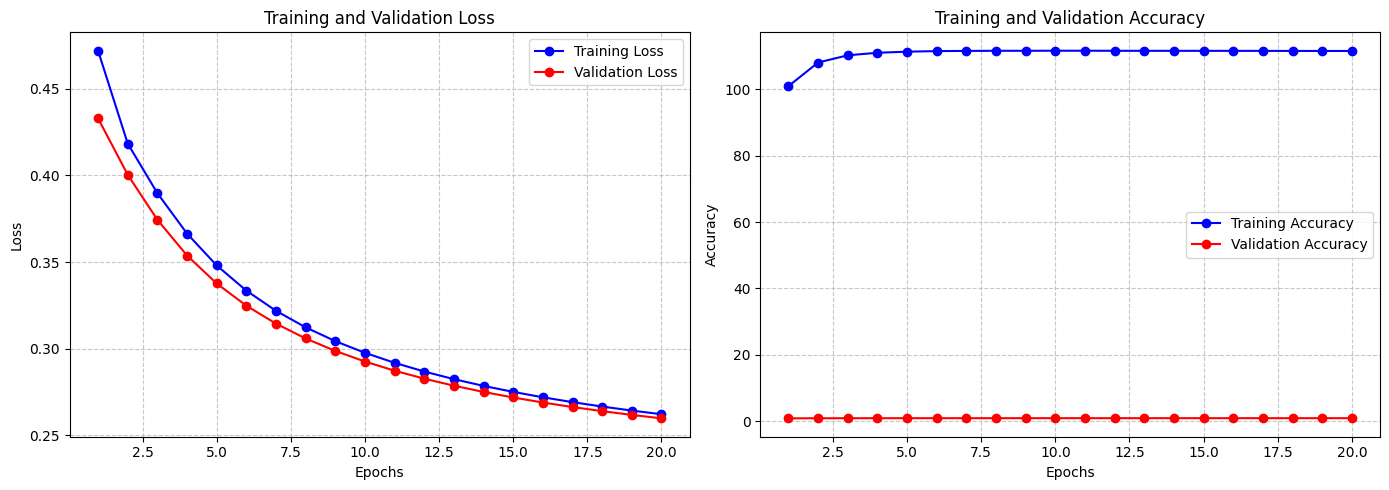

Classification Report:
              precision    recall  f1-score   support

    Airplane     0.7013    0.2230    0.3384      1000
Not Airplane     0.9197    0.9894    0.9533      9000

    accuracy                         0.9128     10000
   macro avg     0.8105    0.6062    0.6459     10000
weighted avg     0.8979    0.9128    0.8918     10000



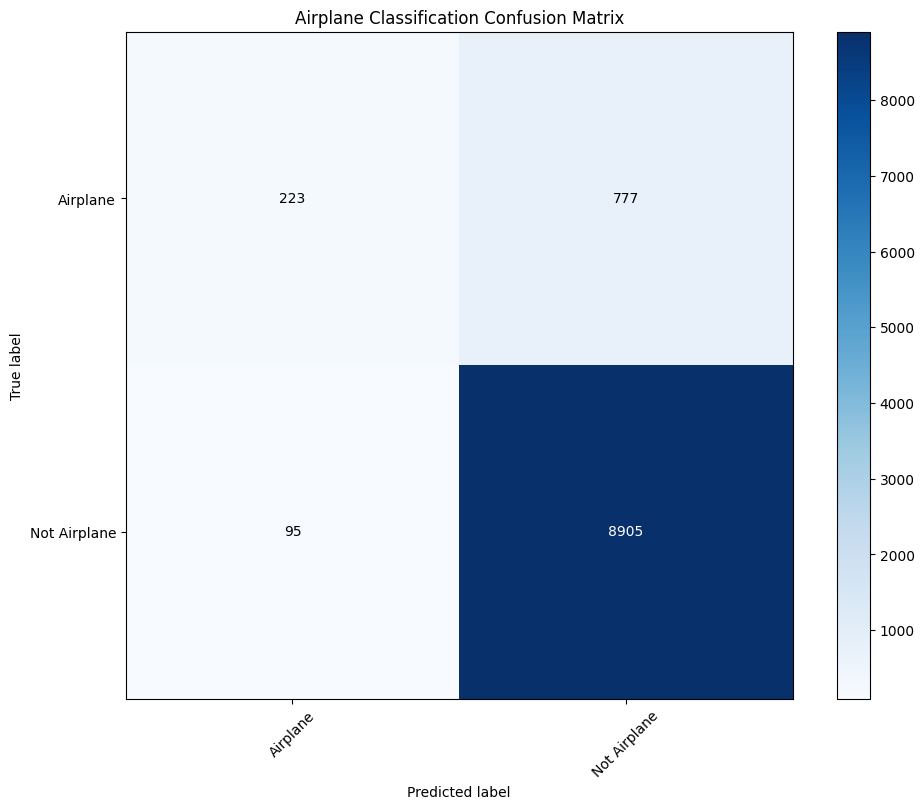

In [6]:
# Plot training history
plot_history(history)

# Evaluate
y_pred = (model.forward(x_test) > 0.5).astype(int)

# Plot confusion matrix and F1 scores
plot_confusion_matrix_and_f1(y_test, y_pred,
                            classes=['Airplane', 'Not Airplane'],
                            title='Airplane Classification Confusion Matrix')


## Task 2: Binary Classification Network with Hidden Layer


In [7]:
# Load binary classification data
X_train, y_train, X_test, y_test = load_cifar10(binary=True, target_class=0)


In [8]:
# Create model with one hidden layer
model = NeuralNetwork([
    DenseLayer(3072, 64, activation=Sigmoid),  # Hidden layer with 64 neurons
    DenseLayer(64, 1, activation=Sigmoid)      # Output layer
])


In [10]:
# Train model
print("Training network with hidden layer...")
history = model.train(X_train, y_train, X_test, y_test,
                      epochs=30, learning_rate=0.05,
                      classification_task=BinaryClassification,
                      )


Training network with hidden layer...
Epoch 1/30 | Loss: 0.3883 | Acc: 114.8413 | Val Loss: 0.3357 | Val Acc: 0.9000
Epoch 2/30 | Loss: 0.3263 | Acc: 115.1280 | Val Loss: 0.3247 | Val Acc: 0.9000
Epoch 3/30 | Loss: 0.3165 | Acc: 115.1280 | Val Loss: 0.3164 | Val Acc: 0.9000
Epoch 4/30 | Loss: 0.3092 | Acc: 115.1280 | Val Loss: 0.3103 | Val Acc: 0.9000
Epoch 5/30 | Loss: 0.3039 | Acc: 115.1280 | Val Loss: 0.3058 | Val Acc: 0.9000
Epoch 6/30 | Loss: 0.2999 | Acc: 115.1280 | Val Loss: 0.3023 | Val Acc: 0.9000
Epoch 7/30 | Loss: 0.2968 | Acc: 115.1280 | Val Loss: 0.2992 | Val Acc: 0.9000
Epoch 8/30 | Loss: 0.2939 | Acc: 115.1280 | Val Loss: 0.2963 | Val Acc: 0.9000
Epoch 9/30 | Loss: 0.2911 | Acc: 115.1244 | Val Loss: 0.2934 | Val Acc: 0.8998
Epoch 10/30 | Loss: 0.2881 | Acc: 115.1086 | Val Loss: 0.2902 | Val Acc: 0.8995
Epoch 11/30 | Loss: 0.2848 | Acc: 115.0226 | Val Loss: 0.2867 | Val Acc: 0.8979
Epoch 12/30 | Loss: 0.2813 | Acc: 114.8373 | Val Loss: 0.2830 | Val Acc: 0.8969
Epoch 13/30

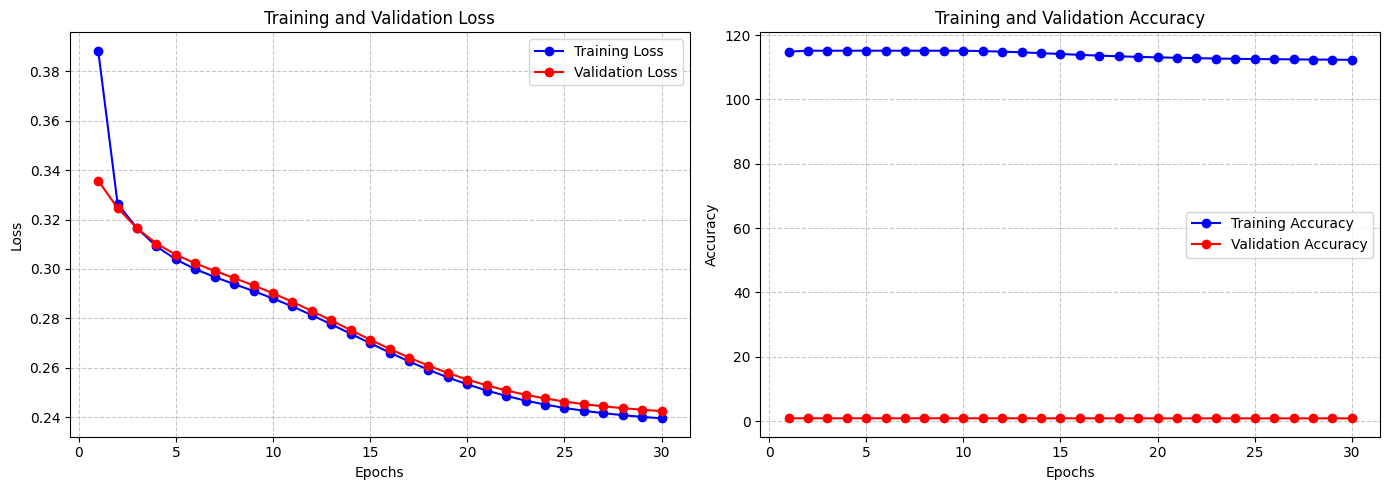

Classification Report:
              precision    recall  f1-score   support

    Airplane     0.6769    0.1990    0.3076      1000
Not Airplane     0.9175    0.9894    0.9521      9000

    accuracy                         0.9104     10000
   macro avg     0.7972    0.5942    0.6298     10000
weighted avg     0.8934    0.9104    0.8876     10000



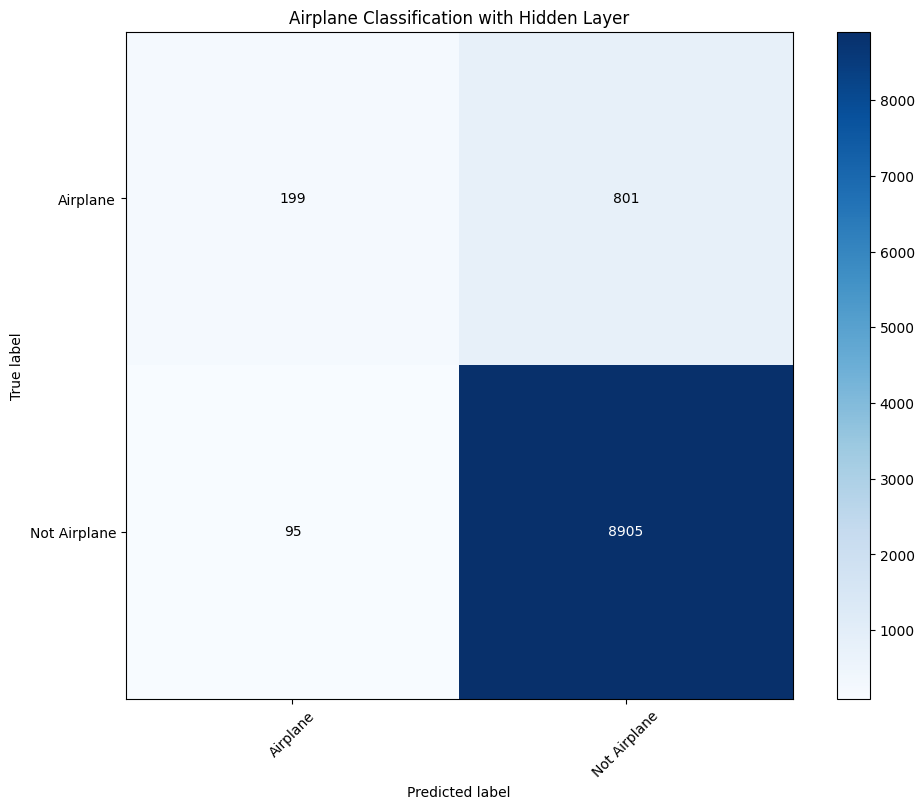

In [12]:
# Plot training history
plot_history(history)

y_pred = (model.forward(X_test) > 0.5).astype(int)

# Plot confusion matrix and F1 scores
plot_confusion_matrix_and_f1(y_test, y_pred,
                            classes=['Airplane', 'Not Airplane'],
                            title='Airplane Classification with Hidden Layer')


## Task 3: Multiclass Classification

In [15]:
# Load full CIFAR-10 dataset
x_train, y_train, x_test, y_test = load_cifar10(binary=False)
y_train = y_train.astype(int)  # Ensure labels are integers
y_test = y_test.astype(int)


In [16]:
# Create model with Sigmoid hidden layer and softmax output
model = NeuralNetwork([
    DenseLayer(3072, 128, activation=BinaryClassification),  # Hidden layer with ReLU
    DenseLayer(128, 10, activation=Softmax)  # 10-class output with softmax
])


TypeError: BinaryClassification.__init__() missing 3 required positional arguments: 'x_batch', 'y_batch', and 'output'